In [23]:
import matplotlib.pyplot as pl
import numpy as np

from vector_similarities import compute_similarity as cs
reload(cs)

from tabulate import tabulate
%matplotlib inline

### Computing similarity measures for raw data and SVD-processed data

Currently looking into:
- symmetric and asymmetric free association data matrices
- SVD decomposed matrices of different dimensionality

In [24]:
methods = ['freeassoc_symmetric', 'freeassoc_symmetric_svd_factorize_5018w_2048d', 'freeassoc_symmetric_svd_factorize_5018w_5018d']

In [25]:
target_positions = []

for method in methods:
    print 'Computing statistics with:', method
    _, _, targets = cs.compute_similarity(method, quiet=False)

    target_positions.append(targets)
    print

Computing statistics with: freeassoc_symmetric
117/144 problems exist with the freeassoc_symmetric vocabulary.
Average similarity with the target: 0.08045 (std=0.095)
Average similarity with all words: 0.00167 (std=0.001)

Computing statistics with: freeassoc_symmetric_svd_factorize_5018w_2048d
117/144 problems exist with the freeassoc_symmetric_svd_factorize_5018w_2048d vocabulary.
Average similarity with the target: 0.22619 (std=0.251)
Average similarity with all words: 0.00281 (std=0.001)

Computing statistics with: freeassoc_symmetric_svd_factorize_5018w_5018d
117/144 problems exist with the freeassoc_symmetric_svd_factorize_5018w_5018d vocabulary.
Average similarity with the target: 0.07875 (std=0.094)
Average similarity with all words: 0.00164 (std=0.001)



### Target positions
Computing the position of the target in the sorted list of dot products for all methods:

In [26]:
limit = [5, 10, 15, 50, 70]

# for every method track how many targets appeared within 'limit[i]' items
solved = np.zeros((len(methods), len(limit)))     

how_many = lambda x, y: len(np.where(x <= y)[0])

for i, targets in enumerate(target_positions):
    for j in range(len(limit)):
        solved[i, j] = how_many(targets, limit[j])

In [27]:
to_print = solved.tolist()

# prepend method names
for i in range(len(to_print)):
    to_print[i].insert(0, methods[i][-11:])

Printing statistics on the position of target among the similar items:

In [28]:
headers = ['Target within %d' % x for x in limit]
print tabulate(to_print, headers=headers)

               Target within 5    Target within 10    Target within 15    Target within 50    Target within 70
-----------  -----------------  ------------------  ------------------  ------------------  ------------------
c_symmetric                  6                  27                  48                  78                  87
5018w_2048d                  9                  28                  40                  70                  82
5018w_5018d                  6                  27                  47                  78                  87


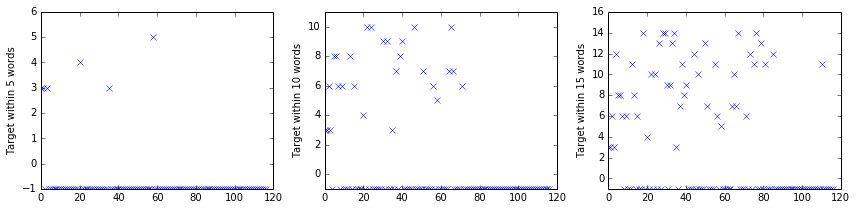

In [29]:
targets_512 = target_positions[-1]

fig = pl.figure(figsize=(12., 3.))

axis = [fig.add_subplot(1, 3, 1), 
        fig.add_subplot(1, 3, 2),
        fig.add_subplot(1, 3, 3)]

for i, ax in enumerate(axis):
    ax.plot(np.where(targets_512 <= limit[i], targets, -1), 'x')
    ax.set_ylabel('Target within ' + str(limit[i]) + ' words')
    ax.set_ylim(-1, limit[i] + 1)

fig.tight_layout()